# Philipp's simple

In [2]:
# import asyncio
# import pandas as pd
# import numpy as np
# import panel as pn
# pn.extension()

# import holoviews as hv
# hv.extension('bokeh')

# nchannels = 25
# buffer = hv.streams.Buffer(data=pd.DataFrame(np.random.randn(10, nchannels).cumsum(axis=1), columns=[chr(65+i) for i in range(nchannels)]))

# def out(data):
#     return hv.NdOverlay(
#         {chr(65+i): hv.Curve(data, 'index', (chr(65+i), 'Amplitude')).opts(subcoordinate_y=True) for i in range(nchannels)}
#     )

# dmap = hv.DynamicMap(out, streams=[buffer]).opts(legend_position='right', legend_cols=2, responsive=True, min_height=600)

# pane = pn.pane.HoloViews(dmap)

# async def stream(event):
#     for i in range(1, 1000):
#         buffer.event(data=pd.DataFrame(np.random.randn(10, nchannels).cumsum(axis=1), columns=[chr(65+i) for i in range(nchannels)], index=np.arange(i*10, i*10+10)))
#         await asyncio.sleep(0.01)

# pn.Column(pn.widgets.Button(on_click=stream, name='Stream'), pane).servable()

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



# My original, threaded, with buttons

In [ ]:
# import time
# import numpy as np
# import pandas as pd
# import holoviews as hv
# import panel as pn
# from threading import Thread

# hv.extension('bokeh')
# pn.extension()

# initial_data = pd.DataFrame(np.random.randn(10, 10).cumsum(axis=1), columns=[chr(65+i) for i in range(10)])
# buffer = hv.streams.Buffer(data=initial_data, length=1000)

# accumulated_data = initial_data.copy()

# def create_stream_plot(data):
#     return hv.NdOverlay(
#         {i: hv.Curve(data, 'index', (chr(65+i), 'Amplitude')).opts(subcoordinate_y=True, tools=['hover']) for i in range(10)}, 'Channel'
#     )
# dmap_stream = hv.DynamicMap(create_stream_plot, streams=[buffer]).opts(width=800, axiswise=True, title='Streaming')

# def create_inspection_plot(data):
#     return hv.NdOverlay(
#         {i: hv.Curve(data, 'index', (chr(65+i), 'Amplitude')).opts(subcoordinate_y=True, tools=['hover']) for i in range(10)}, 'Channel'
#     ).opts(width=800, axiswise=True, shared_axes=False, title='Inspection')

# inspection_plot = create_inspection_plot(initial_data)

# # globals to control streaming state
# streaming = False
# paused = False
# counter = 2

# def stream_data():
#     global streaming, counter, accumulated_data
#     while streaming:
#         if not paused:
#             new_data = pd.DataFrame(np.random.randn(10, 10).cumsum(axis=1), columns=[chr(65+j) for j in range(10)], index=np.arange(counter*10, counter*10+10))
#             new_data = new_data.reset_index()
#             accumulated_data = pd.concat([accumulated_data, new_data])
#             buffer.event(data=new_data)
#             counter += 1
#             dmap_stream.opts(xlim=(0, counter*10))
#         time.sleep(0.07)


# def start_stream(event):
#     global streaming, paused, counter, accumulated_data
#     if not streaming:
#         buffer.clear()
#         accumulated_data = pd.DataFrame(np.zeros((1, 10)), columns=[chr(65+i) for i in range(10)]).reset_index()
#         buffer.event(data=accumulated_data)
#         counter = 2  # Reset counter
#         streaming = True
#         paused = False
#         thread = Thread(target=stream_data)
#         thread.start()
#     else:
#         paused = False

# def pause_stream(event):
#     global paused
#     paused = True

# def stop_stream(event):
#     global streaming, paused, accumulated_data
#     streaming = False
#     paused = False
#     buffer.clear()  # Clear the buffer when stopping
#     accumulated_data = pd.DataFrame(np.zeros((1, 10)), columns=[chr(65+i) for i in range(10)]).reset_index()
#     buffer.event(data=accumulated_data)

# def inspect_plot(event):
#     def update_inspection_plot():
#         global inspection_plot
#         inspection_data = accumulated_data.copy()
#         inspection_plot = create_inspection_plot(inspection_data)
#         right_plot_panel.object = inspection_plot

#     inspect_thread = Thread(target=update_inspection_plot)
#     inspect_thread.start()

# # Buttons!
# start_button = pn.widgets.Button(name='Start Streaming', button_type='primary')
# pause_button = pn.widgets.Button(name='Pause Streaming', button_type='warning')
# stop_button = pn.widgets.Button(name='Stop Streaming', button_type='danger')
# inspect_button = pn.widgets.Button(name='Inspect', button_type='success')

# start_button.on_click(start_stream)
# pause_button.on_click(pause_stream)
# stop_button.on_click(stop_stream)
# inspect_button.on_click(inspect_plot)

# right_plot_panel = pn.pane.HoloViews(inspection_plot)
# layout = pn.Column(
#     pn.Row(start_button, pause_button, stop_button, inspect_button),
#     pn.Row(dmap_stream, right_plot_panel)
# )

# layout.servable()


# My updated, with async

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
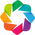

Column
    [0] WidgetBox
        [0] Row
            [0] Button(button_type='success', name='Start Streaming')
            [1] Button(button_type='warning', name='Pause Streaming')
            [2] Button(button_type='danger', name='Stop Streaming')
    [1] HoloViews(DynamicMap, sizing_mode='stretch_both')

In [1]:
import asyncio
import numpy as np
import pandas as pd
import holoviews as hv
import panel as pn

hv.extension('bokeh')
pn.extension()

# Define the number of channels
nchannels = 12

# Initialize the buffer with some initial data
initial_data = pd.DataFrame(np.random.randn(10, nchannels).cumsum(axis=1), columns=[chr(65+i) for i in range(nchannels)])
buffer = hv.streams.Buffer(data=initial_data, length=1000)

def create_stream_plot(data):
    return hv.NdOverlay(
        {chr(65+i): hv.Curve(data, 'index', (chr(65+i), 'Amplitude')).opts(subcoordinate_y=True, tools=['hover']) for i in range(nchannels)},
        'Channel'
    )

dmap_stream = hv.DynamicMap(create_stream_plot, streams=[buffer]).opts(responsive=True, title='Streaming', legend_position='right', min_height=600, legend_cols=2)

# Globals to control streaming state
streaming = False
paused = False
counter = 2
callback = None

async def stream_data():
    global streaming, paused, counter
    while streaming:
        if not paused:
            new_data = pd.DataFrame(
                np.random.randn(10, nchannels).cumsum(axis=1),
                columns=[chr(65+j) for j in range(nchannels)],
                index=np.arange(counter*10, counter*10+10)
            )
            buffer.event(data=new_data)
            counter += 1
            dmap_stream.opts(xlim=(0, counter*10))
        await asyncio.sleep(0.100)

def start_stream(event):
    global streaming, paused, counter, callback
    if not streaming:
        buffer.clear()
        initial_empty = pd.DataFrame(np.zeros((10, nchannels)), columns=[chr(65+i) for i in range(nchannels)])
        buffer.event(data=initial_empty)
        counter = 2  # Reset counter
        streaming = True
        paused = False
        # Use pn.state.add_periodic_callback for periodic tasks
        callback = pn.state.add_periodic_callback(stream_data, period=100, count=None)
        # stream_task = asyncio.create_task(stream_data())
    else:
        paused = False

def pause_stream(event):
    global paused
    paused = True

def stop_stream(event):
    global streaming, paused, callback
    streaming = False
    paused = False
    if callback:
        callback.stop()
        # stream_task.cancel()
    buffer.clear()  # Clear the buffer when stopping
    initial_empty = pd.DataFrame(np.zeros((10, nchannels)), columns=[chr(65+i) for i in range(nchannels)])
    buffer.event(data=initial_empty)

# Buttons
start_button = pn.widgets.Button(name='Start Streaming', button_type='success')
pause_button = pn.widgets.Button(name='Pause Streaming', button_type='warning')
stop_button = pn.widgets.Button(name='Stop Streaming', button_type='danger')

start_button.on_click(start_stream)
pause_button.on_click(pause_stream)
stop_button.on_click(stop_stream)

layout = pn.Column(
    pn.WidgetBox(pn.Row(start_button, pause_button, stop_button)),
    pn.panel(dmap_stream),
)

layout


# Class based

In [ ]:
# import asyncio
# import numpy as np
# import pandas as pd
# import holoviews as hv
# import panel as pn

# hv.extension('bokeh')
# pn.extension()

# class StreamingApp:
#     def __init__(self, nchannels=12):
#         self.nchannels = nchannels
#         self.buffer = hv.streams.Buffer(data=self.initial_data(), length=1000)
#         self.dmap_stream = self.create_dynamic_map()
#         self.streaming = False
#         self.paused = False
#         self.counter = 2
#         self.callback = None
#         self.layout = self.create_layout()

#     def initial_data(self):
#         return pd.DataFrame(np.random.randn(10, self.nchannels).cumsum(axis=1),
#                             columns=[chr(65+i) for i in range(self.nchannels)])
    
#     def create_stream_plot(self, data):
#         return hv.NdOverlay(
#             {chr(65+i): hv.Curve(data, 'index', (chr(65+i), 'Amplitude')).opts(subcoordinate_y=True, tools=['hover']) 
#              for i in range(self.nchannels)},
#             'Channel'
#         )

#     def create_dynamic_map(self):
#         return hv.DynamicMap(self.create_stream_plot, streams=[self.buffer]).opts(
#             responsive=True, title='Streaming', legend_position='right', min_height=600, legend_cols=2
#         )

#     async def stream_data(self):
#         while self.streaming:
#             if not self.paused:
#                 new_data = pd.DataFrame(
#                     np.random.randn(10, self.nchannels).cumsum(axis=1),
#                     columns=[chr(65+j) for j in range(self.nchannels)],
#                     index=np.arange(self.counter*10, self.counter*10+10)
#                 )
#                 self.buffer.event(data=new_data)
#                 self.counter += 1
#                 self.dmap_stream.opts(xlim=(0, self.counter*10))
#             await asyncio.sleep(0.100)

#     def handle_state_change(self, event):
#         if event.new == "Start":
#             self.start_stream()
#         elif event.new == "Pause":
#             self.pause_stream()
#         elif event.new == "Stop":
#             self.stop_stream()

#     def start_stream(self):
#         if not self.streaming:
#             self.buffer.clear()
#             initial_empty = pd.DataFrame(np.zeros((10, self.nchannels)),
#                                          columns=[chr(65+i) for i in range(self.nchannels)])
#             self.buffer.event(data=initial_empty)
#             self.counter = 2  # Reset counter
#             self.streaming = True
#             self.paused = False
#             self.callback = pn.state.add_periodic_callback(self.stream_data, period=100, count=None)
#         else:
#             self.paused = False

#     def pause_stream(self):
#         self.paused = True

#     def stop_stream(self):
#         self.streaming = False
#         self.paused = False
#         if self.callback:
#             self.callback.stop()
#         self.buffer.clear()
#         initial_empty = pd.DataFrame(np.zeros((10, self.nchannels)),
#                                      columns=[chr(65+i) for i in range(self.nchannels)])
#         self.buffer.event(data=initial_empty)
#         self.radio_group.value = 'None'

#     def create_layout(self):
#         # Radio button group for controls
#         self.radio_group = pn.widgets.RadioButtonGroup(
#             name='Stream Control',
#             options=['Start', 'Pause', 'Stop'],
#             align='center',
#             value='None',
#             button_style='outline',
#         )
#         self.radio_group.param.watch(self.handle_state_change, 'value')

#         return pn.Column(
#             self.radio_group,
#             pn.panel(self.dmap_stream),
#             align='start',
#         )

#     def servable(self):
#         return self.layout.servable()

# # Create and serve the streaming app
# app = StreamingApp()
# # app.servable()


# Stream a single curve on top of a static datashaded curve

In [ ]:
# import asyncio
# import numpy as np
# import pandas as pd
# import holoviews as hv
# import datashader as ds
# import holoviews.operation.datashader as hd
# import panel as pn

# hv.extension('bokeh')
# pn.extension()

# template = pn.template.FastListTemplate(
#     title="HoloViz Demo Streaming App",
#     theme="dark",
#     accent="#2e008b",
#     logo="https://aerospace.org/themes/custom/aero/logo.svg",
#     raw_css=[".title { font-style: italic; }"],
# ).servable()

# class StreamingApp:
#     def __init__(self, duration=10, n_historical_traces=10, sampling_interval=0.1, notebook=True):
#         self.duration = duration  # Duration in seconds
#         self.n_historical_traces = n_historical_traces
#         self.sampling_interval = sampling_interval  # Time between samples in seconds
#         self.samples_per_update = max(1, int(1 / self.sampling_interval))  # Number of samples per update
#         self.notebook = notebook # run in notebook (without template)
#         self.buffer = hv.streams.Buffer(data=self.initial_data(), length=10000)
#         self.background = self.create_background()
#         self.dmap_stream = self.create_dynamic_map()
#         self.streaming = False
#         self.paused = False
#         self.counter = 1  # Start from 1 to ensure continuity
#         self.task = None
#         self.spike_added = False  # Track if a spike has been added
#         self.layout = self.create_layout()

#     def initial_data(self):
#         # Initialize with the first batch of samples based on the sampling interval
#         time_vals = np.linspace(0, (self.samples_per_update - 1) * self.sampling_interval, self.samples_per_update)
#         amplitude_vals = np.sin(2 * np.pi * time_vals / self.duration) * (1 + np.random.normal(0, 0.1, self.samples_per_update))
#         return pd.DataFrame({
#             'time': time_vals,
#             'Amplitude': amplitude_vals
#         })

#     def create_background_data(self):
#         # Generate structured sine wave data with a spike in the middle for each trace
#         time_points = np.linspace(0, self.duration, int(self.duration / self.sampling_interval))
#         curves = []

#         for _ in range(self.n_historical_traces):
#             # Create a sine wave with slight variation
#             amplitude = np.sin(2 * np.pi * time_points / self.duration) * (1 + np.random.normal(0, 0.1, size=len(time_points)))
            
#             # Add a spike somewhere in the middle of the trace
#             spike_index = len(time_points) // 2
#             amplitude[spike_index] += np.random.uniform(2, 3)  # Add a smaller spike value

#             data = pd.DataFrame({
#                 'time': time_points,
#                 'Amplitude': amplitude
#             })
#             # Add a row of NaNs to separate each curve
#             nan_row = pd.DataFrame({'time': [np.nan], 'Amplitude': [np.nan]})
#             data = pd.concat([data, nan_row], ignore_index=True)
#             curves.append(data)
#         return pd.concat(curves, ignore_index=True)

#     def create_background(self):
#         # Create a dataset with n_historical_traces and datashade it as a single rasterized RGB image
#         background_data = self.create_background_data()
#         curves = hv.Curve(background_data, 'time', 'Amplitude')
#         return hd.datashade(curves, aggregator=ds.count(), cmap='lightgrey')

#     def create_stream_plot(self, data):
#         return hv.Curve(data, 'time', 'Amplitude').opts(color='blue', tools=['hover'])

#     def create_dynamic_map(self):
#         return hv.DynamicMap(self.create_stream_plot, streams=[self.buffer]).opts(
#             responsive=True, title='Streaming', min_height=600, xlim=(0, self.duration)
#         )

#     async def stream_data(self):
#         while self.streaming:
#             if not self.paused:
#                 # Generate new data for the next batch of samples
#                 start_time = self.counter * self.samples_per_update * self.sampling_interval
#                 time_vals = start_time + np.arange(self.samples_per_update) * self.sampling_interval

#                 # Calculate the sine wave values with variation
#                 sine_values = np.sin(2 * np.pi * time_vals / self.duration)
#                 amplitude_vals = sine_values * (1 + np.random.normal(0, 0.1, size=self.samples_per_update))

#                 # Add a single spike if within the middle of the duration and if no spike has been added yet
#                 if not self.spike_added:
#                     spike_index = np.where((time_vals >= 0.45 * self.duration) & (time_vals <= 0.55 * self.duration))[0]
#                     if len(spike_index) > 0:
#                         spike_point = spike_index[len(spike_index) // 2]  # Pick the middle index for the spike
#                         amplitude_vals[spike_point] += np.random.uniform(2, 3)
#                         self.spike_added = True  # Mark that a spike has been added

#                 new_data = pd.DataFrame({
#                     'time': time_vals,
#                     'Amplitude': amplitude_vals
#                 })

#                 # Stream the new batch of data
#                 self.buffer.send(new_data)
#                 self.counter += 1

#             await asyncio.sleep(self.sampling_interval)

#     def handle_state_change(self, event):
#         if event.new == "Start":
#             self.start_stream()
#         elif event.new == "Pause":
#             self.pause_stream()
#         elif event.new == "Stop":
#             self.stop_stream()

#     def start_stream(self):
#         if not self.streaming:
#             self.buffer.clear()
#             self.buffer.send(self.initial_data())
#             self.counter = 1  # Reset counter to ensure continuity
#             self.streaming = True
#             self.paused = False
#             self.spike_added = False  # Reset spike tracker when starting
#             self.task = asyncio.create_task(self.stream_data())
#         else:
#             self.paused = False

#     def pause_stream(self):
#         self.paused = True
#         if self.task:
#             self.task.cancel()

#     def stop_stream(self):
#         self.streaming = False
#         self.paused = False
#         if self.task:
#             self.task.cancel()
#         self.buffer.clear()
#         self.buffer.send(self.initial_data())
#         self.radio_group.value = 'None'

#     def create_layout(self):
#         # Radio button group for controls
#         self.radio_group = pn.widgets.RadioButtonGroup(
#             name='Stream Control',
#             options=['Start', 'Pause', 'Stop'],
#             align='center',
#             value='None',
#             button_type='primary',
#         )
#         self.radio_group.param.watch(self.handle_state_change, 'value')

#         # Combine background and streaming plot
#         overlay = self.background * self.dmap_stream
#         if self.notebook:
#             return pn.Column(
#                 self.radio_group,
#                 pn.panel(overlay),
#                 align='start',
#             )
#         else:
#             template.sidebar.append(self.radio_group)
#             template.main.append(pn.panel(overlay))
#             return template
        
#     def servable(self):
#         return self.layout.servable()

# # Create and serve the streaming app with specified parameters
# app = StreamingApp()
# app.servable()


In [ ]:
# import asyncio
# import numpy as np
# import pandas as pd
# import holoviews as hv
# from holoviews.streams import Buffer
# import datashader as ds
# import holoviews.operation.datashader as hd
# import panel as pn

# hv.extension('bokeh')
# pn.extension()

# class StreamingApp:
#     def __init__(self, duration=10, n_historical_traces=10, sampling_interval=0.01, notebook=True):
#         self.duration = duration
#         self.n_historical_traces = n_historical_traces
#         self.sampling_interval = sampling_interval
#         self.notebook=notebook
#         self.buffer_length = int(self.duration / self.sampling_interval) + 1
#         self.buffer = Buffer(data=self.initial_data(), length=self.buffer_length)
#         self.current_time = 0
#         self.streaming = False
#         self.paused = False
#         self.task = None
#         self.spike_added = False

#         # Create the plot elements
#         self.background = self.create_background()
#         self.dmap_stream = self.create_dynamic_map()
#         self.layout = self.create_layout()

#     def initial_data(self):
#         # Start with an empty DataFrame
#         return pd.DataFrame({'time': [], 'Amplitude': []})

#     def create_background_data(self):
#         # Generate structured sine wave data with a spike in the middle for each trace
#         time_points = np.arange(0, self.duration + self.sampling_interval, self.sampling_interval)
#         curves = []

#         for _ in range(self.n_historical_traces):
#             # Create a sine wave with slight variation
#             amplitude = np.sin(2 * np.pi * time_points / self.duration) * \
#                         (1 + np.random.normal(0, 0.1, size=len(time_points)))

#             # Add a spike somewhere in the middle of the trace
#             spike_index = len(time_points) // 2
#             amplitude[spike_index] += np.random.uniform(2, 3)

#             data = pd.DataFrame({'time': time_points, 'Amplitude': amplitude})
#             # Add a row of NaNs to separate each curve
#             data = pd.concat([data, pd.DataFrame({'time': [np.nan], 'Amplitude': [np.nan]})], ignore_index=True)
#             curves.append(data)
#         return pd.concat(curves, ignore_index=True)

#     def create_background(self):
#         background_data = self.create_background_data()
#         curves = hv.Curve(background_data, 'time', 'Amplitude')
#         return hd.datashade(curves, aggregator=ds.count(), cmap='lightgrey')

#     def create_stream_plot(self, data):
#         return hv.Curve(data, 'time', 'Amplitude').opts(color='teal')

#     def update_title(self):
#         print(self.streaming, self.paused)
#         if self.paused:
#             return 'Paused'
#         elif self.streaming:
#             return 'Streaming'
#         else:
#             return 'Ready to Stream'
    
#     def create_dynamic_map(self):
#         dmap = hv.DynamicMap(self.create_stream_plot, streams=[self.buffer]).opts(
#             responsive=True, min_height=600, xlim=(0, self.duration)
#         )
#         return dmap

#     async def stream_data(self):
#         while self.streaming:
#             if not self.paused:
#                 if self.current_time > self.duration:
#                     self.pause_stream()
#                     break

#                 # Calculate amplitude using the sine function
#                 amplitude = np.sin(2 * np.pi * self.current_time / self.duration) * \
#                             (1 + np.random.normal(0, 0.1))

#                 # Add a spike in the middle if not already added
#                 if not self.spike_added and 0.45 * self.duration <= self.current_time <= 0.55 * self.duration:
#                     amplitude += np.random.uniform(2, 3)
#                     self.spike_added = True

#                 new_data = pd.DataFrame({'time': [self.current_time], 'Amplitude': [amplitude]})

#                 self.buffer.send(new_data)
#                 self.current_time += self.sampling_interval
#             await asyncio.sleep(self.sampling_interval)

#     def handle_state_change(self, event):
#         if event.new == 'Start':
#             self.start_stream()
#         elif event.new == 'Pause':
#             self.pause_stream()
#         elif event.new == 'Stop':
#             self.stop_stream()

#         # Update the plot title
#         print(event.new, self.update_title())
#         self.dmap_stream.apply.opts(title=self.update_title()) # this is not updating at all

#     def start_stream(self):
#         if not self.streaming:
#             self.buffer.clear()
#             self.current_time = 0
#             self.streaming = True
#             self.paused = False
#             self.spike_added = False
#             self.task = asyncio.create_task(self.stream_data())
#         else:
#             self.paused = False

#     def pause_stream(self):
#         self.paused = True

#     def stop_stream(self):
#         self.streaming = False
#         self.paused = False
#         if self.task:
#             self.task.cancel()
#             self.task = None
#         self.buffer.clear()
#         self.radio_group.value = 'None'

#     def create_layout(self):
#         # Radio button group for controls
#         self.radio_group = pn.widgets.RadioButtonGroup(
#             name='Stream Control',
#             options=['Start', 'Pause', 'Stop'],
#             value='None',
#             button_type='primary',
#         )
#         self.radio_group.param.watch(self.handle_state_change, 'value')

#         # Combine background and streaming plot
#         overlay = self.background * self.dmap_stream.opts(title=self.update_title())

#         # Create the layout
#         layout = pn.Column(
#             self.radio_group,
#             pn.pane.HoloViews(overlay, sizing_mode='stretch_both'),
#             sizing_mode='stretch_both'
#         )
#         print('notebook', self.notebook)
#         if self.notebook:
#             return pn.Column(
#                 self.radio_group,
#                 pn.panel(overlay),
#                 align='start',
#             )
#         else:
#             template = pn.template.FastListTemplate(
#                 main = pn.panel(overlay),
#                 sidebar= self.radio_group,
#                 title="HoloViz Demo Streaming App",
#                 theme="dark",
#                 accent="#2e008b",
#                 logo="https://aerospace.org/themes/custom/aero/logo.svg",
#                 raw_css=[".title { font-style: italic; }"],
#             )
#             # template.sidebar.append(self.radio_group)
#             # template.main.append(pn.panel(hv.Curve([])))
#             return template

#     def create_servable_app(self):
#         return self.layout.servable()

# # Create and serve the streaming app
# app = StreamingApp(duration=2, n_historical_traces=10, sampling_interval=0.01, notebook=True)
# app.create_servable_app()


In [ ]:
import numpy as np
import pandas as pd
import holoviews as hv
import param
from holoviews.streams import Buffer
import datashader as ds
import holoviews.operation.datashader as hd
import panel as pn

hv.extension('bokeh')
pn.extension()

class StreamingApp(param.Parameterized):
    title = param.String(default='Ready to Stream')  # Use param.String for reactive title

    def __init__(self, duration=2, n_historical_traces=10, sampling_interval=0.01, notebook=False):
        super().__init__()
        self.duration = duration
        self.n_historical_traces = n_historical_traces
        self.sampling_interval = sampling_interval
        self.notebook = notebook
        self.buffer_length = int(self.duration / self.sampling_interval) + 1
        self.buffer = Buffer(data=self.initial_data(), length=self.buffer_length)
        self.current_time = 0
        self.streaming = False
        self.paused = False
        self.task = None
        self.spike_added = False

        # Create the plot elements
        self.background = self.create_background()
        self.layout = self.create_layout()

    def initial_data(self):
        # Start with an empty DataFrame
        return pd.DataFrame({'time': [], 'Amplitude': []})

    def create_background_data(self):
        # Generate structured sine wave data with a spike in the middle for each trace
        time_points = np.arange(0, self.duration + self.sampling_interval, self.sampling_interval)
        curves = []

        for _ in range(self.n_historical_traces):
            # Create a sine wave with slight variation
            amplitude = np.sin(2 * np.pi * time_points / self.duration) * \
                        (1 + np.random.normal(0, 0.2, size=len(time_points)))

            # Add a spike somewhere in the middle of the trace
            spike_index = len(time_points) // 2
            amplitude[spike_index] += np.random.uniform(1, 1.7)

            data = pd.DataFrame({'time': time_points, 'Amplitude': amplitude})
            # Add a row of NaNs to separate each curve
            data = pd.concat([data, pd.DataFrame({'time': [np.nan], 'Amplitude': [np.nan]})], ignore_index=True)
            curves.append(data)
        return pd.concat(curves, ignore_index=True)

    def create_background(self):
        background_data = self.create_background_data()
        curves = hv.Curve(background_data, 'time', 'Amplitude')
        return hd.datashade(curves, aggregator=ds.count(), cmap='lightgrey', line_width=1)

    @param.depends('title')
    def create_overlay(self):
        # Create the dynamic map with the updated title
        dmap_stream = hv.DynamicMap(self.create_stream_plot, streams=[self.buffer]).opts(
            responsive=True, min_height=600, xlim=(0, self.duration), title=self.title
        )
        overlay = self.background * dmap_stream *  hv.HLine(1.8).opts(line_dash='dashed', color='blue', line_width=2)
        return overlay.opts(ylim = (None, 2))

    def create_stream_plot(self, data):
        return hv.Curve(data, 'time', 'Amplitude').opts(color='orange', line_width=2)

    def stream_data(self):
        if not self.streaming:
            return  # Do nothing if not streaming
        if self.paused:
            return  # Do nothing if paused

        if self.current_time > self.duration:
            self.pause_stream()
            return

        # Calculate amplitude using the sine function
        amplitude = np.sin(2 * np.pi * self.current_time / self.duration) * \
                    (1 + np.random.normal(0, 0.1))

        # Add a spike in the middle if not already added
        if not self.spike_added and 0.48 * self.duration <= self.current_time <= 0.52 * self.duration:
            amplitude += np.random.uniform(1.8, 1.9)
            self.spike_added = True

        new_data = pd.DataFrame({'time': [self.current_time], 'Amplitude': [amplitude]})

        self.buffer.send(new_data)
        self.current_time += self.sampling_interval

    def handle_state_change(self, event):
        if event.new == 'Start':
            self.start_stream()
        elif event.new == 'Pause':
            self.pause_stream()
        elif event.new == 'Stop':
            self.stop_stream()

    def start_stream(self):
        if not self.streaming:
            self.buffer.clear()
            self.current_time = 0
            self.streaming = True
            self.paused = False
            self.spike_added = False
            # Start the periodic callback
            self.task = pn.state.add_periodic_callback(
                self.stream_data, period=int(self.sampling_interval * 1000), count=None)
        else:
            self.paused = False
        self.update_title()

    def pause_stream(self):
        self.paused = True
        self.update_title()

    def stop_stream(self):
        self.streaming = False
        self.paused = False
        if self.task:
            self.task.stop()
            self.task = None
        self.buffer.clear()
        self.radio_group.value = 'None'
        self.update_title()

    def update_title(self):
        if self.paused:
            self.title = 'Paused'
        elif self.streaming:
            self.title = 'Streaming'
        else:
            self.title = 'Ready to Stream'

    def create_layout(self):
        # Radio button group for controls
        self.radio_group = pn.widgets.RadioButtonGroup(
            name='Stream Control',
            options=['Start', 'Pause', 'Stop'],
            value='None',
            button_type='primary',
        )
        self.radio_group.param.watch(self.handle_state_change, 'value')

        # # Title pane that updates with self.title
        # title_pane = pn.pane.Markdown(f"### {self.title}", sizing_mode='stretch_width')
        # self.param.watch(lambda *events: title_pane.param.trigger('object'), 'title')

        # Combine background and streaming plot
        overlay_pane = pn.panel(self.create_overlay, sizing_mode='stretch_both')

        # Create the layout
        if self.notebook:
            layout = pn.Column(
                self.radio_group,
                # title_pane,
                overlay_pane,
                align='start',
            )
        else:
            template = pn.template.FastListTemplate(
                main=[overlay_pane],
                sidebar=[self.radio_group],
                title="HoloViz Demo Streaming App",
                theme="dark",
                accent="#2e008b",
                logo="https://aerospace.org/themes/custom/aero/logo.svg",
            )
            layout = template
        return layout

    def create_servable_app(self):
        return self.layout.servable()

# Create and serve the streaming app
app = StreamingApp(duration=2, n_historical_traces=10, sampling_interval=0.01, notebook=True)
app.create_servable_app()

In [ ]:
# hv.Curve([]) * hv.HLine(.5).opts(line_dash='dashed', color='blue', line_width=2)